In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

# %env TF_MLC_LOGGING=1
# %env TF_CPP_MIN_LOG_LEVEL=2

In [2]:
example = 'laplace'
script = 'generate_example'

In [3]:
# import os
# matlab_path = "/Applications/MATLAB_R2023a.app/bin/matlab"
# examplematlab = "\'"+example+"\'"
# matlabcmd = f"{matlab_path} -nodisplay -nosplash -nodesktop -r \"{script}({examplematlab}); exit;\" | tail -n +11"
# with open("temp.sh", 'w') as f:
#     f.write(matlabcmd)
#     f.close()
# os.system(f"bash temp.sh")
# os.remove("temp.sh")

In [4]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95, batch_size = 1024)

In [5]:
model = GreenNN()
model.build()

In [6]:
%%time
lossHistory = model.train(data, epochs = {'adam':int(0), 'lbfgs':int(1000)})

Training with Adam:
Training with LBFGS:
Loss at epoch 10: Training = 8.517E-01, Validation = 1.354E+01
Loss at epoch 20: Training = 2.936E-01, Validation = 6.032E-01
Loss at epoch 30: Training = 2.496E-01, Validation = 4.578E-01
Loss at epoch 40: Training = 6.661E-02, Validation = 3.788E-02
Loss at epoch 50: Training = 1.939E-02, Validation = 1.977E-02
Loss at epoch 60: Training = 6.711E-03, Validation = 6.886E-03
Loss at epoch 70: Training = 3.501E-03, Validation = 3.551E-03
Loss at epoch 80: Training = 2.283E-03, Validation = 2.301E-03
Loss at epoch 90: Training = 1.639E-03, Validation = 1.858E-03
Loss at epoch 100: Training = 1.218E-03, Validation = 1.163E-03
Loss at epoch 110: Training = 1.048E-03, Validation = 9.641E-04
Loss at epoch 120: Training = 9.410E-04, Validation = 1.118E-03
Loss at epoch 130: Training = 8.280E-04, Validation = 9.919E-04
Loss at epoch 140: Training = 6.926E-04, Validation = 8.654E-04
Loss at epoch 150: Training = 6.055E-04, Validation = 7.952E-04
Loss at 

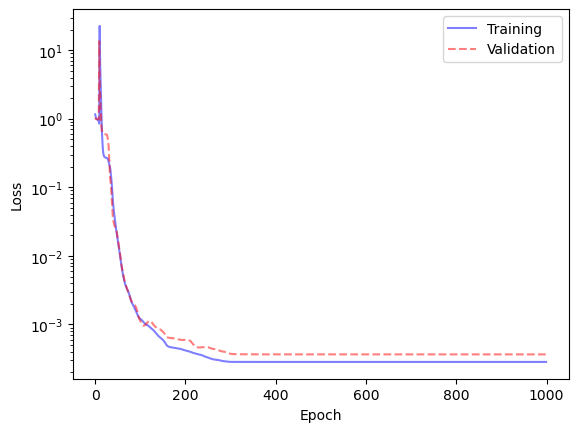

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

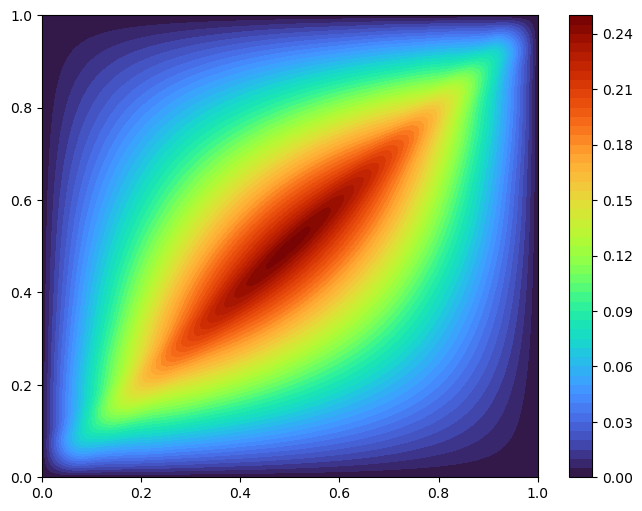

In [12]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [10]:
model.saveModels('savedModels/laplace')